# [done] AF0

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats.multicomp as mc
from scipy import stats
import pickle
import os
from pandas.errors import EmptyDataError

import sys
sys.path.append("./scripts/modules")

from benchmarking_definitions import *
from plotting import *

In [2]:
tags = ["sim1_h37rv_mutant_1_50_0.01"] + \
["sim1_h37rv_mutant_{}_50_0.05".format(mn) for mn in range(1, 3)] + \
["sim1_h37rv_mutant_{}_50_0.5".format(mn) for mn in range(1, 3)] + \
["sim1_h37rv_mutant_1_100_0.01"] + \
["sim1_h37rv_mutant_{}_100_0.05".format(mn) for mn in range(1, 3)] + \
["sim1_h37rv_mutant_{}_100_0.5".format(mn) for mn in range(1, 3)] + \
["sim1_h37rv_mutant_1_200_0.01"] + \
["sim1_h37rv_mutant_{}_200_0.05".format(mn) for mn in range(1, 3)] + \
["sim1_h37rv_mutant_{}_200_0.5".format(mn) for mn in range(1, 3)] + \
["sim1_h37rv_mutant_1_400_0.01"] + \
["sim1_h37rv_mutant_{}_400_0.05".format(mn) for mn in range(1, 3)] + \
["sim1_h37rv_mutant_{}_400_0.5".format(mn) for mn in range(1, 3)] + \
["sim1_h37rv_mutant_1_700_0.01"] + \
["sim1_h37rv_mutant_{}_700_0.05".format(mn) for mn in range(1, 3)] + \
["sim1_h37rv_mutant_{}_700_0.5".format(mn) for mn in range(1, 3)]

In [3]:
len(tags)

25

# Check for final AF0 files

In [6]:
source_dir = "/n/scratch/users/s/sm624/benchmarking/final_variants/AF0"

In [7]:
tool_suffix = {"FB": "freebayes", "LF": "lofreq", "MT": "mutect2", "VD": "vardict", "VS": "varscan2"}

In [18]:
for tool in tools:

    if tool != "PL":

        print(tool)
    
        suffix = tool_suffix[tool]
    
        for tag in tags:
    
            AF0_variant_file = f"{source_dir}/{tag}.{suffix}.csv"
    
            if not os.path.isfile(AF0_variant_file):
                print(tag)
    
        print()

FB

LF

MT

VD

VS



In [8]:
original_source_dir = "/n/scratch/users/s/sm624/benchmarking/final_variants/ISS_H37Rv"
AF0_source_dir = "/n/scratch/users/s/sm624/benchmarking/final_variants/AF0"

In [9]:
num_var_df = pd.DataFrame(columns=["tag", "tool", "AF01", "AF0"])
df_i = 0

for tool in tools:

    if tool != "PL":

        suffix = tool_suffix[tool]
    
        for tag in tags:
    
            original_summary_df = pd.read_csv(f"{original_source_dir}/{tag}.{suffix}.csv")
            AF0_summary_df = pd.read_csv(f"{AF0_source_dir}/{tag}.{suffix}.csv")
            
            num_var_df.loc[df_i] = [tag, tool_mapping[tool], original_summary_df.shape[0], AF0_summary_df.shape[0]]
            df_i += 1

In [10]:
num_var_df["diff"] = num_var_df["AF0"]-num_var_df["AF01"]

In [11]:
num_var_df.head()

,tag,tool,AF01,AF0,diff
0,sim1_h37rv_mutant_1_50_0.01,FreeBayes,145,145,0
1,sim1_h37rv_mutant_1_50_0.05,FreeBayes,181,181,0
2,sim1_h37rv_mutant_2_50_0.05,FreeBayes,166,166,0
3,sim1_h37rv_mutant_1_50_0.5,FreeBayes,177,177,0
4,sim1_h37rv_mutant_2_50_0.5,FreeBayes,161,161,0


In [12]:
order_df = pd.DataFrame(columns=["tool", "diff"])
df_i = 0

for tool in tools:
    
    tool_name = tool_mapping[tool]
    
    tool_df = num_var_df[num_var_df.tool == tool_name]
    
    diff = tool_df["diff"].max()
    
    order_df.loc[df_i] = [tool_name, diff]
    df_i += 1
    
order_df.sort_values("diff", inplace=True, ascending=False)
tool_order = list(order_df.tool.values)

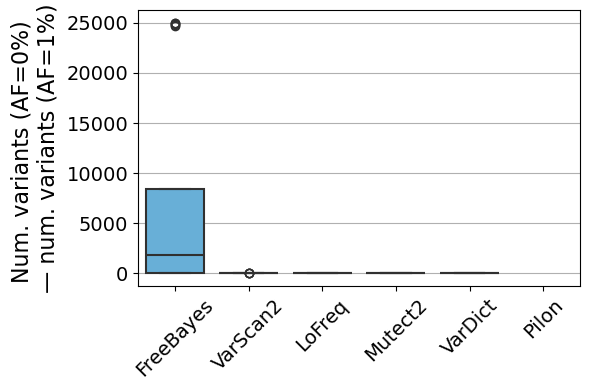

In [14]:
fig, ax = plt.subplots(figsize=(6,4))

ax.yaxis.grid(True, linewidth=0.8, zorder=1) 

ax.tick_params(axis='x', labelrotation=45, labelsize=14) 

#ax.set_yticks(np.arange(0, 26000, 5000))
#ax.set_yticklabels(["{:,}".format(x) for x in np.arange(0, 26000, 5000)])

ax.tick_params(axis='y', labelsize=14)

sns.boxplot(data=num_var_df, y="diff", x="tool", hue="tool", linewidth=1.5, palette=tool_colors_, order=tool_order)

ax.set_xlabel("")
ax.set_ylabel("Num. variants (AF=0%) \n— num. variants (AF=1%)", ma="center", fontsize=16, labelpad=5)

plt.tight_layout()
    
file_name = "./figures/METHODS/ISS_AF0_diff_AF01.jpeg"
plt.savefig(file_name, bbox_inches='tight', dpi = 300 , transparent = True)

file_name = "./figures/METHODS/ISS_AF0_diff_AF01.pdf"
plt.savefig(file_name, bbox_inches='tight', dpi = 300 , transparent = True)

plt.show()

In [35]:
num_var_df["diff"].value_counts()

diff
0        106
4          2
1815       1
1977       1
1873       1
1992       1
1877       1
8429       1
8213       1
8263       1
8443       1
8157       1
25033      1
25016      1
24643      1
24885      1
24832      1
5          1
2          1
Name: count, dtype: int64

In [36]:
num_var_df.shape[0]

125

In [37]:
(106/125)*100

84.8

In [38]:
num_var_df[num_var_df["diff"] > 0]

,tag,tool,AF01,AF0,diff
10,sim1_h37rv_mutant_1_200_0.01,FreeBayes,213,2028,1815
11,sim1_h37rv_mutant_1_200_0.05,FreeBayes,237,2214,1977
12,sim1_h37rv_mutant_2_200_0.05,FreeBayes,252,2125,1873
13,sim1_h37rv_mutant_1_200_0.5,FreeBayes,254,2131,1877
14,sim1_h37rv_mutant_2_200_0.5,FreeBayes,253,2245,1992
15,sim1_h37rv_mutant_1_400_0.01,FreeBayes,25,8468,8443
16,sim1_h37rv_mutant_1_400_0.05,FreeBayes,52,8481,8429
17,sim1_h37rv_mutant_2_400_0.05,FreeBayes,51,8264,8213
18,sim1_h37rv_mutant_1_400_0.5,FreeBayes,54,8317,8263
19,sim1_h37rv_mutant_2_400_0.5,FreeBayes,49,8206,8157


In [42]:
list(num_var_df[num_var_df["diff"] > 0].tool).count("LoFreq")

0

In [43]:
list(num_var_df[num_var_df["diff"] > 0].tool).count("VarScan2")

4

In [39]:
list(num_var_df[num_var_df["diff"] > 0].tool).count("FreeBayes")

15

In [40]:
num_var_df[num_var_df.tool == "FreeBayes"]["diff"].mean()

np.float64(7017.92)

In [41]:
for tool in tools:
    
    tool_name = tool_mapping[tool]
    
    tool_df = num_var_df[num_var_df.tool == tool_name]
    
    diff = tool_df["diff"].max()
    
    print(tool_name, diff)

FreeBayes 25033
LoFreq 0
Mutect2 0
Pilon nan
VarDict 0
VarScan2 5
